In [74]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
%load_ext autoreload
%autoreload 2
from pylab import*

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Least squares and linear basis functions models
## Least squares

In [75]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    gram=np.dot(np.transpose(tx),tx)
    im=np.dot(np.transpose(tx),y)
    opt_w=np.linalg.solve(gram,im)
    mse= compute_loss(y,tx,opt_w)
    return opt_w, mse
    # ***************************************************

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [76]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    print(y.shape,tx.shape)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    opt_weight, mse= least_squares(y,tx)
    print(opt_weight)
    print(mse)
    

test_your_least_squares()


(10000,) (10000, 2)
[ 73.293922    13.47971243]
15.3858878688


## Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [77]:
# load dataset
x, y = load_data()
print("shape of x {}".format((x).shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [78]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    ret=np.zeros((len(x),degree+1))
    
    for i in np.arange(degree+1):
        ret[:,i]=x**(i)
    
    return ret
    # ***************************************************

In [79]:
print(x.shape)

(50,)


In [80]:
build_poly(x,12).shape

(50, 13)

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.258582776677375
Processing 3th experiment, degree=7, rmse=0.24965870360907166
Processing 4th experiment, degree=12, rmse=0.24151773115041963


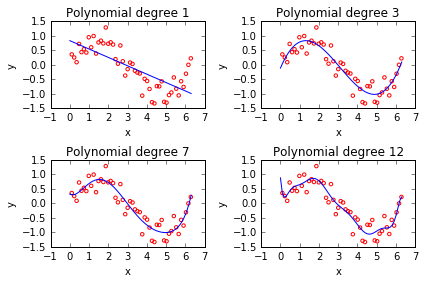

In [81]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        phi=build_poly(x, degree)
        weight, mse= least_squares(y, phi)
        # ***************************************************
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate rmse: TODO
        rmse= np.sqrt(2*mse)
        # ***************************************************

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weight, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()


polynomial_regression()

# Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [82]:
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    k=len(y)
    indices= np.random.permutation(np.arange(k))
    rd_x=x[indices]
    rd_y=y[indices]
   
    split=int(ratio*k)
    x1, x2 = rd_x[:split], rd_x[split:]
    y1, y2 = rd_y[:split], rd_y[split:]
    return x1, y1, x2, y2

#Test de la fonction = OK

x_train, y_train, x_test, y_test = split_data(x,y,0.2)
print(x_train.shape)
print(x_test.shape)
    # ***************************************************

(10,)
(40,)


Then, test your `split_data` function below.

In [83]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed)
    # ***************************************************
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    phi_train=build_poly(x_train, degree)
    #print (phi_train)
    #print(phi_train.shape)
    phi_test=build_poly(x_test, degree)
    # ***************************************************
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    #train the model on the training set
    w, mse_tr= least_squares(y_train, phi_train)
    # ***************************************************
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    mse_te = compute_loss(y_test, phi_test, w)
    rmse_tr, rmse_te = np.sqrt(2*mse_tr), np.sqrt(2*mse_te)
    # ***************************************************

    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

seed = 1
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)
        

proportion=0.9, degree=1, Training RMSE=0.455, Testing RMSE=0.621
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.214
proportion=0.9, degree=7, Training RMSE=0.257, Testing RMSE=0.189
proportion=0.9, degree=12, Training RMSE=0.254, Testing RMSE=0.394
proportion=0.5, degree=1, Training RMSE=0.400, Testing RMSE=0.553
proportion=0.5, degree=3, Training RMSE=0.237, Testing RMSE=0.306
proportion=0.5, degree=7, Training RMSE=0.218, Testing RMSE=0.336
proportion=0.5, degree=12, Training RMSE=0.210, Testing RMSE=0.370
proportion=0.1, degree=1, Training RMSE=0.453, Testing RMSE=0.748
proportion=0.1, degree=3, Training RMSE=0.111, Testing RMSE=0.674
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=2.471
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=2.201


# Ridge Regression
Please fill in the function below.

In [105]:
def ridge_regression(y, tx, lamb):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    k=len(y)
    l=tx.shape[1]
    #LA=lamb*np.eye(l,l)
    LA=lamb*2*k*np.eye(l,l)
    LA[0,0]=0
    
    gram=np.dot(np.transpose(tx),tx)+LA
    im=np.dot(np.transpose(tx),y)
    weight=np.linalg.solve(gram,im)
    mse= compute_loss(y,tx,weight)
    return weight, mse

    #Test if lambda=0 OK

#height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
#x, mean_x, std_x = standardize(height)
#y, tx = build_model_data(x, weight)

#w_ridge, rr_cost= ridge_regression(y,tx,1000)
#print(rr_cost)
#rmse=(2*rr_cost)**(0.5)
#print(rmse)
    # ***************************************************

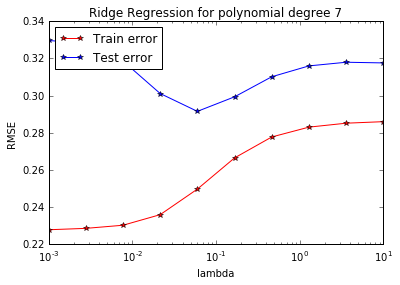

In [106]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-3, 1, 10)    
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed)
    
    #print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
    # ***************************************************
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    phi_train=build_poly(x_train, degree)
    phi_test=build_poly(x_test, degree)
    #print(phi_train[1,:])
    #print(phi_test[1,:])
    #print(phi_train.shape, phi_test.shape)
    # ***************************************************
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression with different lambda: TODO
    curve_test=[]
    curve_train=[]
    lambs=[]
    
    for la in lambdas:
    
        w, mse_tr = ridge_regression(y_train, phi_train, la)

        rmse_tr=(2*mse_tr)**(0.5)
        mse_te= compute_loss(y_test, phi_test, w)
        rmse_te=(2*mse_te)**(0.5)
        
        curve_test.append(rmse_te)
        curve_train.append(rmse_tr)
        lambs.append(la)
        
    fig, axes = plt.subplots()
    plt.semilogx(lambs, curve_train,'r-*',label="Train error")
    plt.semilogx(lambs, curve_test, 'b-*',label="Test error")
    axes.set_xlabel('lambda')
    axes.set_ylabel('RMSE')
    axes.set_title('Ridge Regression for polynomial degree 7')
    axes.legend(loc=2)
    # ***************************************************
    # return rmse_tr,rmse_te
    plt.show()

seed = 1
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)